# ATAP Juxtorpus Notebook
This notebook provides a simple workflow for the user to upload, partition and compare their text collections.
The workflow consists of three interactive ATAP tools, [**ATAP_corpus_loader**](https://github.com/Australian-Text-Analytics-Platform/atap-corpus-loader), [**ATAP_corpus_slicer**](https://github.com/Australian-Text-Analytics-Platform/atap-corpus-slicer) and [**Juxtorpus**](https://github.com/Sydney-Informatics-Hub/juxtorpus/). 
The user can upload their text collections as plain text files or spreadsheets, partition data based on versitile conditions, and generate side-to-side comparison between corpus pairs.

<div class="alert alert-block alert-warning">
    
For any questions, feedback, and/or comments about the tool, please contact the Sydney Informatics Hub at [sih.info@sydney.edu.au](mailto:sih.info@sydney.edu.au?subject=[ATAP]%20Juxtorpus%20inquiry).</div>

<div class="alert alert-block alert-warning">
<b>Jupyter Notebook User Guide</b> 

If you are new to Jupyter Notebook, feel free to take a quick look at [this user guide](documents/jupyter-notebook-guide.pdf) for basic information on how to use a notebook.
</div>

<div class="alert alert-block alert-info">
<b>ATAP Corpus Loader User Guide</b>
    
For instructions on how to use the Corpus Loader, please refer to the [Corpus Loader User Guide](documents/Corpus_Loader_User_Guide.pdf). The user guides for the Slicer and Juxtorpus are currently under development.
</div>

## 1. Import Python Packages

In [1]:
from app.JuxVisual import *
from atap_corpus_slicer import CorpusSlicer
from atap_corpus_loader import CorpusLoader
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


NotificationArea()

NotificationArea()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
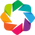

In [2]:
hv.extension('bokeh')

## 2. Load the data
<div class="alert alert-block alert-info">

This notebook will allow you to upload text data in one or more text files, each file contains one document. Alternatively, you can also upload multiple texts as an excel or CSV spreadsheet, in which each row is considered as one document ([see example dataset here](data/ADO/qldelection2020_candidate_tweets.csv)). Multiple files can be zipped and uploaded as a single archive file.
</div>
<div class="alert alert-block alert-warning">

The example dataset under *data/ADO/* is a twitter dataset of all Queensland election candidates during 2020, kindly supplied by the [Australian Digital Observatory](https://www.digitalobservatory.net.au/), an LDaCa partner Australian humanities infrastructure.
</div>

<div class="alert alert-block alert-info">
    
Execute the next cell to run the [*ATAP corpus loader*](https://github.com/Australian-Text-Analytics-Platform/atap-corpus-loader) *UI* so that you can upload your files and build your corpus following the instructions below. Supported file types are .txt, .csv, .xlsx or a zip archive of these file types.  
Once a corpus is successfully built, you can continue with the rest of the notebook to run the Document Similarity Tool with your corpus.
</div>

<div class="alert alert-block alert-info">
<b>Using the ATAP corpus loader to load your dataset/corpus</b> <br>
<td><img src='./documents/img/corpus_loader.png' style='width: 1000px'/></td> <br>
In order to use the document similarity tool, the user needs to build their corpus with the ATAP corpus loader. As a brief overview, the steps to use the loader are as follows (Please check the picture above for locations referred by superscript numbers):

1. Upload your text files using the file explorer pane on the left<sup>1</sup>. <p>If the pane is not activated, clicking on the folder icon<sup>2</sup> will show you the file explorer pane.
Files can be uploaded into any folder by either drag-n-drop or via the upload button<sup>3</sup> <br>
Wait until your corpus is uploaded before you return to the notebook and execute the codes.

2. Execute the following code cell to run the ATAP Corpus Loader in order to build your corpus from the uploaded files, all supported filetypes will be displayed and can be filtered<sup>4</sup> in the corpus-loader.

3. Choose the files in the selector pane<sup>5</sup>, then click the 'Load as corpus' button<sup>6</sup>.  
If loading from a spreadsheet with multiple columns, first, select the correct header of the column that contains the text data<sup>7</sup>. Then make sure the required metadata columns are checked<sup>8</sup> with the correct datatype<sup>9</sup> for your corpus.  
For example, if one column consists of text, the datatype TEXT is appropriate and no changes are necessary.  
If plain text files are loaded, the Corpus Loader also automatically creates and includes the filename as TEXT type metadata.

4. Give your corpus a name<sup>10</sup> and click on the button “Build corpus”<sup>11</sup>. Wait until you receive the message “Corpus … built successfully”.   
Review your corpus in the Corpus Overview or continue immediately to the next code cell in the notebook.  
Refer to the screenshot above for each necessary operation.<br>

</div>

<div class="alert alert-block alert-warning">

The corpus loader also supports to load a metadata spreadsheet and join with the text data with a column of unique identifier, or using the OniLoader to build a corpus from a public LDaCa collection. All these advanced usage can be found in the [Corpus Loader User Guide](documents/Corpus_Loader_User_Guide.pdf).
</div>

In [3]:
corpora: CorpusLoader = CorpusLoader(root_directory='./', 
                                     include_meta_loader=True, 
                                     include_oni_loader=False,
                                     run_logger=True)

slicer: CorpusSlicer = CorpusSlicer(corpus_loader=corpora)
slicer

NotificationArea()

CorpusSlicer(name='CorpusSlicer01232')

In [ ]:
# Define the word list that you decide to exclude from the analysis in the following line, if you don't have any, leave it as excluded_words = []
# Single or double quote the words and delimiter them with comma, like this: excluded_words = ['these', 'are', 'words', 'I', 'definitely', 'want', 'to', 'exclude']
excluded_words = []
# If you want to include the stopwords pre-defined here: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_extraction/_stop_words.py
# Remove the "#" in front of the following line, if there is one. 
# Otherwise, add a "#" in front of the line to not include pre-defined English stopwords.
excluded_words.extend(ENGLISH_STOP_WORDS)
pn.extension('tabulator')

In [ ]:
Jux_dashboard = visualise_jux(corpora, fixed_stopwords=excluded_words)
Jux_dashboard.servable()